# Clustering and Visualizing Enrollment

In [230]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [231]:
# data
enrollment_data = pd.read_csv('enrollment.csv')
enrollment_data.head()

,person_id,term_code,classification,major_code,subject,number,campus
0,10131,201710,JR,RCSC,CSCI,2333,BRW
1,10131,201710,JR,RCSC,CSCI,2344,BRW
2,10131,201710,JR,RCSC,CSCI,2380,BRW
3,10131,201620,JR,RCSC,CSCI,1170,BRW
4,10131,201620,JR,RCSC,CSCI,1370,BRW


### People and major codes

In [232]:
# unique number of people + how many rows we have
ppl = enrollment_data.groupby('person_id')['person_id'].count()
# unique major codes
majorcodes = enrollment_data.groupby('major_code')['major_code'].count()
print(majorcodes['RCSC'])
print(majorcodes['CSCI'])
ppl

38027
2430


person_id
10131    19
10134    20
10143    19
10155    14
10164    10
         ..
42261     1
42264     1
42267     1
42270     1
42273     1
Name: person_id, Length: 10215, dtype: int64

### Split CS major and CS minor

In [233]:
# CS majors -- major code is CS
csmajors = enrollment_data.loc[(enrollment_data['major_code'] =='RCSC') | (enrollment_data['major_code'] =='CSCI')]

###############################################
# we dont care about CS minors right now -- 11/11/23 9:20pm
# CS minors -- take CS2 but are not CS major
'''
csminor = enrollment_data[(enrollment_data['number']== 2380) & ((enrollment_data['major_code'] !='RCSC') & (enrollment_data['major_code'] !='CSCI'))]

# Duplicates in minor due to students who retook CS 2380
is_duplicate = csminor['person_id'].duplicated()
if is_duplicate.any():
    duplicate_id = csminor.loc[is_duplicate, 'person_id']
    duplicate_id = duplicate_id.unique()
    print(duplicate_id)

# now, we want to get all rows related to the minor person ids (since we only grabbed where number=2380)
csminor = enrollment_data[]
'''

"\ncsminor = enrollment_data[(enrollment_data['number']== 2380) & ((enrollment_data['major_code'] !='RCSC') & (enrollment_data['major_code'] !='CSCI'))]\n\n# Duplicates in minor due to students who retook CS 2380\nis_duplicate = csminor['person_id'].duplicated()\nif is_duplicate.any():\n    duplicate_id = csminor.loc[is_duplicate, 'person_id']\n    duplicate_id = duplicate_id.unique()\n    print(duplicate_id)\n\n# now, we want to get all rows related to the minor person ids (since we only grabbed where number=2380)\ncsminor = enrollment_data[]\n"

### Find CS majors who graduated

have taken automata and senior project

In [234]:
# includes BS & MS Students
majorsgraduated = csmajors.loc[(enrollment_data['number'] == 4325) | (enrollment_data['number'] == 4390)]

# use person_id to grab all courses the students have taken
majorgrad_id = majorsgraduated['person_id'].unique()

# grab all classes under those ids and put in dataframe
gradPaths = pd.DataFrame()
for id in majorgrad_id:
    student_data = enrollment_data[enrollment_data['person_id'] == id]
    gradPaths = pd.concat([gradPaths, student_data])
gradPaths

,person_id,term_code,classification,major_code,subject,number,campus
0,10131,201710,JR,RCSC,CSCI,2333,BRW
1,10131,201710,JR,RCSC,CSCI,2344,BRW
2,10131,201710,JR,RCSC,CSCI,2380,BRW
3,10131,201620,JR,RCSC,CSCI,1170,BRW
4,10131,201620,JR,RCSC,CSCI,1370,BRW
...,...,...,...,...,...,...,...
46718,38364,202320,SR,RCSC,CSCI,3341,ONL
46719,38364,202320,SR,RCSC,CSCI,4333,ED
46720,38364,202320,SR,RCSC,CSCI,4341,ED
46721,38364,202220,SR,RCSC,CSCI,3328,ED


### Data Preprocessing

In [217]:
#check for null values
gradPaths.isnull().values.any()

False

In [218]:
#split term code into year and term 
gradPaths['term_code'] = gradPaths['term_code'].astype(str)

gradPaths['year'] = gradPaths['term_code'].str[:-2]
gradPaths['semester'] = gradPaths['term_code'].str[-2:]

gradPaths.drop('term_code', axis=1, inplace=True)
gradPaths.drop('subject', axis=1, inplace=True)
gradPaths.drop('major_code', axis=1, inplace=True)

gradPaths

,person_id,classification,number,campus,year,semester
0,10131,JR,2333,BRW,2017,10
1,10131,JR,2344,BRW,2017,10
2,10131,JR,2380,BRW,2017,10
3,10131,JR,1170,BRW,2016,20
4,10131,JR,1370,BRW,2016,20
...,...,...,...,...,...,...
46718,38364,SR,3341,ONL,2023,20
46719,38364,SR,4333,ED,2023,20
46720,38364,SR,4341,ED,2023,20
46721,38364,SR,3328,ED,2022,20


In [219]:
# create a copy of gradPaths df for plotting purposes
gradPaths_3d = gradPaths

gradPaths_3d = gradPaths_3d[gradPaths_3d['classification'] != "  "]

# rename classification -> number
# 1 = freshman, 2=sophomore, 3=junior, 4=senior, 5=MS=masters, 6=PB=post-bachelors???
mapping = {'FR': 1, 'SO': 2, 'JR': 3, 'SR': 4, 'MS': 5,'MA': 5, 'PB': 6}

# replace the string values with integer values
gradPaths_3d['classification'] = gradPaths_3d['classification'].replace(mapping)

gradPaths_3d


C:\Users\alvar\AppData\Local\Temp\ipykernel_20588\1590950302.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gradPaths_3d['classification'] = gradPaths_3d['classification'].replace(mapping)


,person_id,classification,number,campus,year,semester
0,10131,3,2333,BRW,2017,10
1,10131,3,2344,BRW,2017,10
2,10131,3,2380,BRW,2017,10
3,10131,3,1170,BRW,2016,20
4,10131,3,1370,BRW,2016,20
...,...,...,...,...,...,...
46718,38364,4,3341,ONL,2023,20
46719,38364,4,4333,ED,2023,20
46720,38364,4,4341,ED,2023,20
46721,38364,4,3328,ED,2022,20


C:\Users\alvar\AppData\Local\Temp\ipykernel_20588\2692610183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gradPaths_3d['classification'] = pd.to_numeric(gradPaths_3d['classification'])


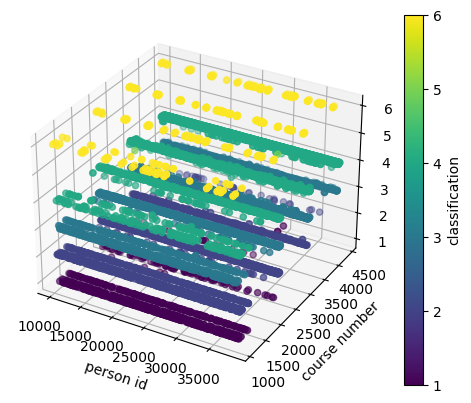

In [220]:
# change the datatype of column from object -> int
gradPaths_3d['classification'] = pd.to_numeric(gradPaths_3d['classification'])

# create a 3D axes object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot the dataframe with three columns on the x, y and z axes
ax.scatter(gradPaths_3d['person_id'], gradPaths_3d['number'], gradPaths_3d['classification'], c=gradPaths_3d['classification'])
ax.set_xlabel('person id')
ax.set_ylabel('course number')
ax.set_zlabel('classification')
fig.colorbar(ax.collections[0], label='classification')
plt.show() 

C:\Users\alvar\AppData\Local\Temp\ipykernel_20588\3645315173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gradPaths_3d['semester'] = pd.to_numeric(gradPaths_3d['semester'])


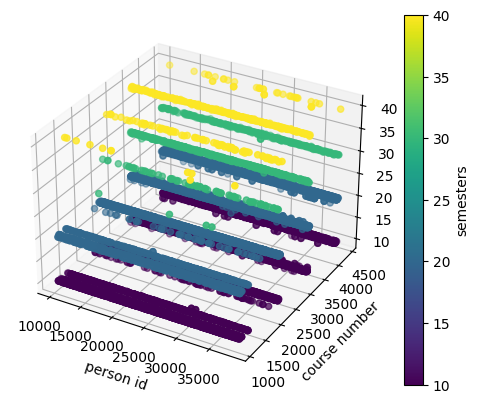

In [221]:
# change the datatype of column from object -> int
gradPaths_3d['semester'] = pd.to_numeric(gradPaths_3d['semester'])

# create a 3D axes object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot the dataframe with three columns on the x, y and z axes
ax.scatter(gradPaths_3d['person_id'], gradPaths_3d['number'], gradPaths_3d['semester'], c=gradPaths_3d['semester'])
ax.set_xlabel('person id')
ax.set_ylabel('course number')
ax.set_zlabel('semester')
fig.colorbar(ax.collections[0], label='semesters')
plt.show() 

### KNN

In [222]:
gradPaths.dtypes

person_id          int64
classification    object
number             int64
campus            object
year              object
semester          object
dtype: object

In [223]:
df = gradPaths
df['year'] = df['year'].astype(int)
to_encode = list(df.select_dtypes(include=['object']).columns)
print(to_encode)

df[to_encode].nunique()

['classification', 'campus', 'semester']


classification    7
campus            7
semester          4
dtype: int64

In [224]:
# Create the encoder
encoder = OneHotEncoder(handle_unknown='error', sparse_output=False)

# Apply the encoder
df_enc = pd.DataFrame(encoder.fit_transform(df[to_encode]), columns=encoder.get_feature_names_out(to_encode))

#drop the old columns
df.drop(columns = to_encode, axis=1, inplace=True)

# Concatenate the one-hot encoded columns to the original DataFrame
df = pd.concat([gradPaths, df_enc], axis=1)

In [225]:
# get rid of trailing blank space
df.columns = df.columns.str.strip()

index_to_drop = df[df['classification_'] == 1].index
# Drop the row(s) with 'classification_' equal to 1
df.drop(index_to_drop, inplace=True)
# Drop the 'classification_' column
df.drop('classification_', axis=1, inplace=True)
# Reset the index if needed
df.reset_index(drop=True, inplace=True)

df

,person_id,number,year,classification_FR,classification_JR,classification_MA,classification_PB,classification_SO,classification_SR,campus_BRW,campus_ED,campus_HED,campus_OFC,campus_OLA,campus_OLS,campus_ONL,semester_10,semester_20,semester_30,semester_40
0,10131.0,2333.0,2017.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,10131.0,2344.0,2017.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,10131.0,2380.0,2017.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,10131.0,1170.0,2016.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,10131.0,1370.0,2016.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30647,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
30648,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
30649,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
30650,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [226]:
#drop null values
df.dropna(subset=['person_id'], inplace=True)
df.dropna(subset=['classification_FR'], inplace=True)

df

,person_id,number,year,classification_FR,classification_JR,classification_MA,classification_PB,classification_SO,classification_SR,campus_BRW,campus_ED,campus_HED,campus_OFC,campus_OLA,campus_OLS,campus_ONL,semester_10,semester_20,semester_30,semester_40
0,10131.0,2333.0,2017.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,10131.0,2344.0,2017.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,10131.0,2380.0,2017.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,10131.0,1170.0,2016.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,10131.0,1370.0,2016.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7793,21921.0,2333.0,2017.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7794,21921.0,3328.0,2017.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7795,21921.0,2344.0,2017.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7796,21921.0,3340.0,2017.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Calculate number of semesters per student

10 = Fall
20 = Spring
30 = Summer 1
40 = Summer 2


Fall and Spring --> 1 semester

Summer --> 0.5 semester

In [227]:
df_copy = df

# int to float
df_copy['semester_30'] = df_copy['semester_30'].astype(float)
df_copy['semester_40'] = df_copy['semester_40'].astype(float)

# Update summers to count as half a semester
df_copy.loc[df_copy['semester_30'] == 1, 'semester_30'] = 0.5
df_copy.loc[df_copy['semester_40'] == 1, 'semester_40'] = 0.5

#drop separate instances of classes. keep 1 entry per semester
df_copy_no_duplicates = df_copy.drop_duplicates(subset=['person_id', 'semester_10', 'semester_20', 'semester_30', 'semester_40'], keep='first') 
# Sum the weighted columns to get the total number of semesters
df_copy_no_duplicates['total_semesters'] = df_copy_no_duplicates[['semester_10', 'semester_20', 'semester_30', 'semester_40']].sum(axis=1)
total = df_copy_no_duplicates.groupby('person_id')['total_semesters'].sum()
df_copy_no_duplicates.drop('total_semesters', axis=1, inplace=True)
df_copy_no_duplicates['total_semesters'] = df_copy_no_duplicates['person_id'].map(total)
df_copy_no_duplicates

# add column to df
df = pd.merge(df, total, on='person_id', how='left')
df

C:\Users\alvar\AppData\Local\Temp\ipykernel_20588\3967145605.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_no_duplicates['total_semesters'] = df_copy_no_duplicates[['semester_10', 'semester_20', 'semester_30', 'semester_40']].sum(axis=1)
C:\Users\alvar\AppData\Local\Temp\ipykernel_20588\3967145605.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_no_duplicates.drop('total_semesters', axis=1, inplace=True)
C:\Users\alvar\AppData\Local\Temp\ipykernel_20588\3967145605.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,person_id,number,year,classification_FR,classification_JR,classification_MA,classification_PB,classification_SO,classification_SR,campus_BRW,...,campus_HED,campus_OFC,campus_OLA,campus_OLS,campus_ONL,semester_10,semester_20,semester_30,semester_40,total_semesters
0,10131.0,2333.0,2017.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.5
1,10131.0,2344.0,2017.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.5
2,10131.0,2380.0,2017.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.5
3,10131.0,1170.0,2016.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.5
4,10131.0,1370.0,2016.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7793,21921.0,2333.0,2017.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7794,21921.0,3328.0,2017.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7795,21921.0,2344.0,2017.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7796,21921.0,3340.0,2017.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


Label and Features

In [228]:
y = df['total_semesters'].astype(str) #label
X = df.drop(columns = 'total_semesters', axis=1) #features

In [229]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

print(X_train.shape)
print(X_test.shape)

NameError: name 'train_test_split' is not defined

Implement KNN classifier

In [ ]:
def train_test_knn(X_train, X_test, y_train, y_test, k):
    #Create the model
    model = KNeighborsClassifier(n_neighbors = k)
    #Train the model
    model.fit(X_train,y_train)
    #Test the model 
    class_label_predictions = model.predict(X_test)
    #Accuracy score
    acc_score = accuracy_score(y_test,class_label_predictions)
    
    return acc_score

In [ ]:
def visualize_accuracy(hyperparam_range, acc):

    fig = plt.figure()
    ax = fig.add_subplot(111)
    p = sns.lineplot(x=hyperparam_range, y=acc, marker='o', label = 'Full training set')
        
    plt.title('Test set accuracy of the model predictions, for ' + ','.join([str(h) for h in hyperparam_range]))
    ax.set_xlabel('Hyperparameter value')
    ax.set_ylabel('Accuracy')
    plt.show()

In [ ]:
def train_multiple_knns(k_range):
    accuracy_list = []

    for k in k_range:
        score = train_test_knn(X_train, X_test, y_train, y_test, k)
        print('Accuracy score: ' + str(score))
        accuracy_list.append(float(score))
    
    return accuracy_list

Train on different values of k

In [ ]:
k_range = [3, 30, 300]
acc = train_multiple_knns(k_range)

visualize_accuracy(k_range, acc)

In [ ]:
k_range = np.arange(1, 10, step = 1) 

acc = train_multiple_knns(k_range)
visualize_accuracy(k_range,acc)

### Calculate time taken to complete degree
using 'term_code'. count unique terms. sum. this is how many semesters it took  them
!! be careful with summers !!

if they took summer classes, likely finished faster

CS HEALTH PROGRAM

In [240]:
mygradPaths = pd.DataFrame()
for id in majorgrad_id:
    student_data = enrollment_data[enrollment_data['person_id'] == id]
    mygradPaths = pd.concat([mygradPaths, student_data])
mygradPaths

,person_id,term_code,classification,major_code,subject,number,campus
0,10131,201710,JR,RCSC,CSCI,2333,BRW
1,10131,201710,JR,RCSC,CSCI,2344,BRW
2,10131,201710,JR,RCSC,CSCI,2380,BRW
3,10131,201620,JR,RCSC,CSCI,1170,BRW
4,10131,201620,JR,RCSC,CSCI,1370,BRW
...,...,...,...,...,...,...,...
46718,38364,202320,SR,RCSC,CSCI,3341,ONL
46719,38364,202320,SR,RCSC,CSCI,4333,ED
46720,38364,202320,SR,RCSC,CSCI,4341,ED
46721,38364,202220,SR,RCSC,CSCI,3328,ED


In [241]:
# keep only unique semesters for each person

# Assign weights to each season: fall: 1.0, spring: 1.0, summer 1: 0.25, summer 2: 0.25
#gradPaths['term_count'] = gradPaths['term_code'].apply(lambda x: 1 if x % 10 in [10,20] else 0.25)

# group rows by person_id and sum up weights in term_count
#gradPathCount = gradPaths.groupby('person_id')['term_code']

## remove summers
# terms = terms[~terms['term_code'].astype(str).str.endswith(('30', '40'))]

# sum number of semesters for each person

######
# Create a list to store the results. number of semesters + number courses taken
result_list = []

for id in majorgrad_id:
    # Filtering data for each person_id
    person_data = mygradPaths[mygradPaths['person_id'] == id]

    # Count the number of unique semesters and courses
    semester_count = person_data['term_code'].nunique()
    course_count = len(person_data)

    # Append the results to the list
    result_list.append({'person_id': id, 'semester_count': semester_count, 'course_count': course_count})

# Create a DataFrame from the list of dictionaries
result_df = pd.DataFrame(result_list)

print(result_df)


      person_id  semester_count  course_count
0         10131               8            19
1         10134               6            20
2         10143               8            19
3         10248               4            10
4         10260               7            20
...         ...             ...           ...
1048      38295              10            24
1049      38310               5            11
1050      38316               6            20
1051      38352              11            28
1052      38364               8            18

[1053 rows x 3 columns]


In [242]:
# Get unique majorgrad_id values (assuming this is defined somewhere)
majorgrad_id = mygradPaths['person_id'].unique()

# Create a list to store the results
result_list = []

for id in majorgrad_id:
    # Filtering data for each person_id
    person_data = mygradPaths[gradPaths['person_id'] == id]

    # Count the number of unique semesters and courses
    semester_count = person_data['term_code'].nunique()
    course_count = len(person_data)

    # Append the results to the list
    result_list.append({'person_id': id, 'semester_count': semester_count, 'course_count': course_count})

# Create a DataFrame from the list of dictionaries
result_df = pd.DataFrame(result_list)

print(result_df)

      person_id  semester_count  course_count
0         10131               8            19
1         10134               6            20
2         10143               8            19
3         10248               4            10
4         10260               7            20
...         ...             ...           ...
1048      38295              10            24
1049      38310               5            11
1050      38316               6            20
1051      38352              11            28
1052      38364               8            18

[1053 rows x 3 columns]


In [243]:

# Create a list to store the results
weighted = []

for id in majorgrad_id:
    # Filtering data for each person_id
    person_data = mygradPaths[mygradPaths['person_id'] == id]

     # Identify courses that end with a specific pattern
    courses_to_halve = person_data[person_data['number'].astype(str).str.endswith(('30', '40'))]

    # Exclude courses_to_halve from person_data
    person_data_filtered = person_data[~person_data['number'].astype(str).str.endswith(('30', '40'))]

    # Count the number of unique semesters and courses
    semester_count = person_data['term_code'].nunique()
    course_count = len(person_data_filtered) + len(courses_to_halve) / 2  # Halve the count for specific courses

    # Append the results to the list
    weighted.append({'person_id': id, 'semester_count': semester_count, 'course_count': course_count})

# Create a DataFrame from the list of dictionaries
result_df = pd.DataFrame(result_list)

print(result_df)


      person_id  semester_count  course_count
0         10131               8            19
1         10134               6            20
2         10143               8            19
3         10248               4            10
4         10260               7            20
...         ...             ...           ...
1048      38295              10            24
1049      38310               5            11
1050      38316               6            20
1051      38352              11            28
1052      38364               8            18

[1053 rows x 3 columns]


In [244]:

# Find the maximum term code for each major_id
max_term_per_major = mygradPaths.groupby('person_id')['term_code'].max().reset_index()

# Merge with the original DataFrame to get the corresponding rows
result_df = pd.merge(mygradPaths, max_term_per_major, how='inner', left_on=['person_id', 'term_code'], right_on=['person_id', 'term_code'])

# Filter rows where graduation term matches the maximum term
graduation_df = result_df[result_df['term_code'] == result_df['term_code']]

# Select relevant columns for the final result
result_df = graduation_df[['person_id', 'term_code']]
cleaned_df = result_df.drop_duplicates(subset=['person_id', 'term_code'], keep='first')

print(cleaned_df)


      person_id  term_code
0         10131     201910
3         10134     202010
6         10143     201910
9         10248     201720
10        10260     202010
...         ...        ...
2902      38295     202420
2906      38310     202420
2909      38316     202420
2914      38352     202230
2915      38364     202410

[1053 rows x 2 columns]


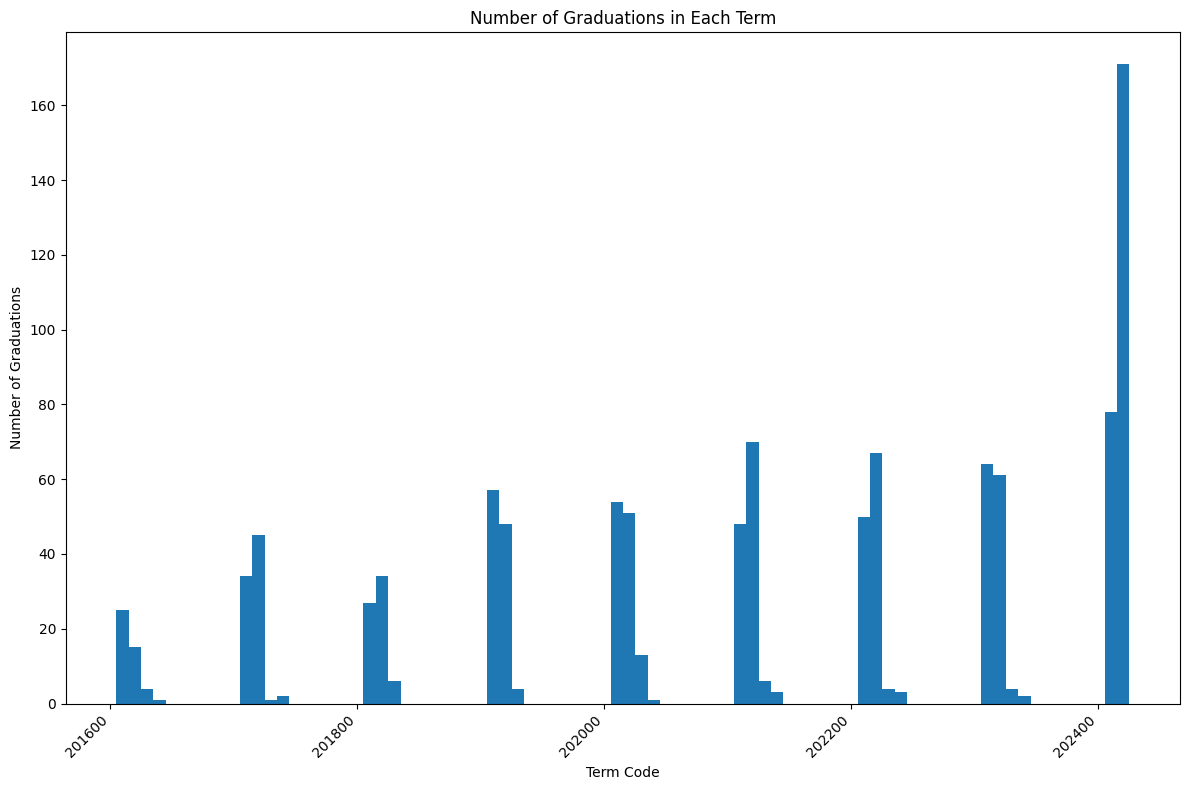

In [245]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming gradPaths is your DataFrame

# Find the maximum term code for each major_id
max_term_per_major = mygradPaths.groupby('person_id')['term_code'].max().reset_index()

# Merge with the original DataFrame to get the corresponding rows
result_df = pd.merge(mygradPaths, max_term_per_major, how='inner', left_on=['person_id', 'term_code'], right_on=['person_id', 'term_code'])

# Filter rows where graduation term matches the maximum term
graduation_df = result_df[result_df['term_code'] == result_df['term_code']]

# Count the number of major_id that have graduated in each specific term
graduation_count_per_term = graduation_df.groupby('term_code')['person_id'].nunique().reset_index()

# Convert the result to a list
graduation_count_list = graduation_count_per_term.values.tolist()

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.bar(graduation_count_per_term['term_code'], graduation_count_per_term['person_id'], width=10)
plt.xlabel('Term Code')
plt.ylabel('Number of Graduations')
plt.title('Number of Graduations in Each Term')

# Show all x-axis labels with rotation
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


graph length of completion for all CS majors that graduated

### Outliers
who's completing it fast? Who's taking longer? Why?

analyze their paths

### Plots!